### Understanding neural networks

Understanding neurons:
- We have an input layer, hidden layers and finally an output layer
- There is a calculation that weights the value of each input
- The activation function is applied

Activation function examples:
Activation functions introduce non-linearity to neural network input data. This is because real life phenomena rarely follow linear behavior. Additionally, each activation function has its own advantages.

- Threshold function: 0/1 heaviside function
- Sigmoid function : 1 / (1 + e^-x) 
- Rectifier function : max(x, 0)
- Hyperbolic tangent: (1 - e^(-2x)) / (1 + e^(-2x))

Threshold & sigmoid functions ideal for output values between 0 and 1.

Hyperbolic tangent centres around zero and acts as a normalizer for subsequent layers of the neural network to operate on.

How Neural Networks learn - Backpropagation:
- Given inputs, weights are applied, activation function is applied and the neural network produces a prediction
- Prediction is compared with a true value
- Compute some established cost that illustrates how similar the prediction is to the true value
- Goal of the neural network is to produce the weights that minimize the cost function.
- Cost function example: 1/2 * (y_pred - y_true)^2
- Epoch: number of passes the entire training dataset has completed


Minimizing the cost function:
- In general, this is a convex optimization problem with a unique global minimum
- Several algorithms exist to solve this optimization problem
- Examples include gradient descent & stochastic gradient descent

Gradient Descent algorithm:
- Start with some learning rate (hyperparameter) > 0
- Start with some input 
- Loop: compute gradient at current point
    - input = input - learning_rate * gradient
    - convergence condition (some tolerance reached)

Stochastic Gradient Descent algorithm:
- Does not require objective function to be convex
- Choose initial input parameters and learning rate
- Loop:
    - randomly shuffle examples in the training set
    - compute gradient at a single point 
    - input = input - learning rate * gradient at point
Note: GD is generally quicker than SGD because of the randomized fluctuations we see in SGD

Process:
1) Randomly initialize the weights to numbers close to 0 but not 0

2) Input the first observation of dataset into input layer, each feature in one input node

3) Forward propagation - from left to right, neurons are activated such taht the imact of each neuron's activation is limited by the weights. We obtain a predicted result y.

4) Compare the predicted result to the true value of y. Compute the cost using the given cost function.

5) Backpropagation - from right to left update the weights according to how much they are responsible for the error
6) Repeat steps 1-5 after each observation or batch of observations

7) When the whole training set is passed, that makes an epoch.

In general, the more epochs pass, the more accurate the ANN will be.

Business problem:
- Given some information about bank customers 
- We want to minimize the churn rate (rate at which customers are leaving bank).
- Dataset contains 10,000 observations

### Importing libraries

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [33]:
tf.__version__

'2.2.0'

### Importing the dataset

In [34]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
print(X, y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]] [1 0 1 ... 1 1 0]


### Encoding categorical data

In [36]:
# Label encoding for the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

#One-Hot encoding for the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [42]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting dataset into training and testing set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Initializing the ANN

In [45]:
# We will build the ANN as a sequence of layers instead of
# computational graph

ann = tf.keras.models.Sequential()

### Adding the input and hidden layers to the ANN

In [46]:
# Add a single hidden layer with re-lu activation function
# the number of neurons is a sort of hyperparameter to be tuned
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Add a second hidden layer with 6 neurons and relu activation function
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [47]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the ANN

In [59]:
# Configure the model for training
# Optimizer - optimizer to perform stochastic gradient descent
# loss - determines the loss function 
# metrics - list of metrics to be evaluated by the model when training & testing
ann.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', metrics = ['accuracy'])


### Training the ANN

In [49]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7960: 0s - loss: 0.5108 - accuracy: 
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.7964
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8064
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8094
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8114
Epoch 10/100
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8631
Epoch 81/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8636
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8621
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8618
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8643
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8635
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8622
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8612
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8621
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 

### Predictions for a single observation

Use our ANN model to predict if the customer with the following informations will leave the bank:
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000
- Number of Products: 2
- Does this customer have a credit card? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: 50000
- So, should we say goodbye to that customer?

In [50]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


### Predictions using the testing set

In [51]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Generating a confusion matrix

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

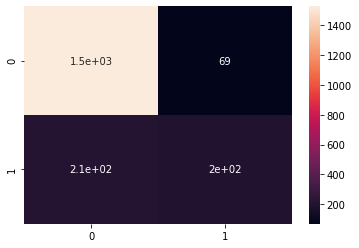

In [57]:
sns.heatmap(cm, annot=True)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.48      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

